# INNOMATICS RESEARCH LAB INTERNSHIP WORK 

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,classification_report,f1_score,matthews_corrcoef,recall_score,plot_roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,mean_squared_error,mean_absolute_error
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/sagarpy/sagar-py/main/data.csv')

In [3]:
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108045,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [5]:
df.isna().sum()

x1    5
x2    3
y     0
dtype: int64

### It is found that there are some missing values in x1 and x2

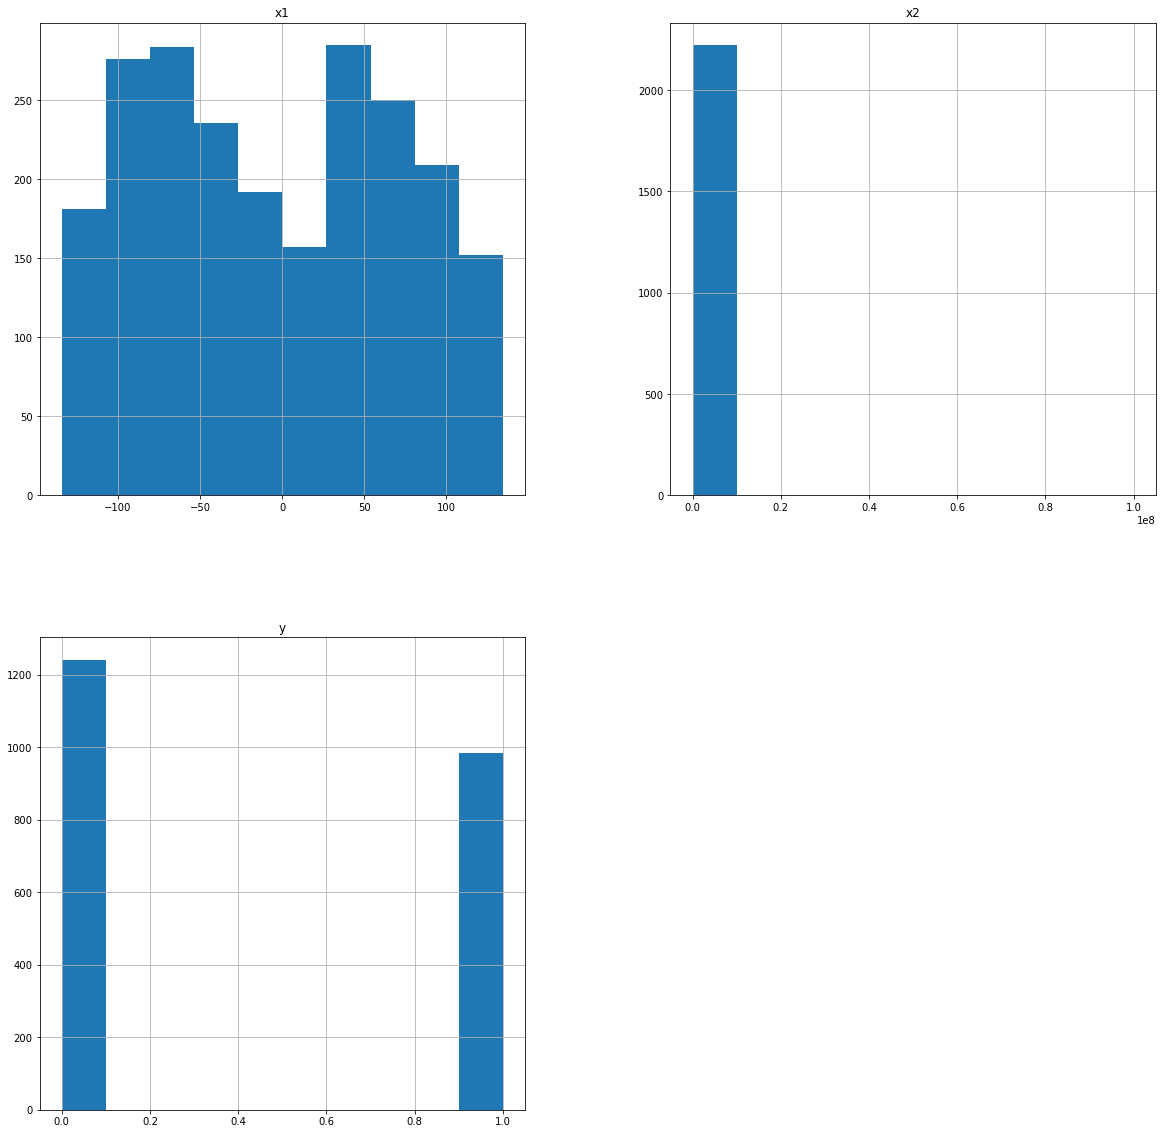

In [6]:
#Plotting distributon to understand the feautures
p = df.hist(figsize = (20,20))

### Imputing x1 value with mean

In [7]:
df['x1'].fillna(df['x1'].mean(), inplace = True)
df.isna().sum()

x1    0
x2    3
y     0
dtype: int64

### Imputing x2 value with median because from distribution it clearly understood it does not satisfy normal dstribution

In [8]:
df['x2'].fillna(df['x2'].median(), inplace = True)
df.isna().sum()

x1    0
x2    0
y     0
dtype: int64

### So now Missing Values are imputed and data is made clean to analyse and building model

# Visualise the data

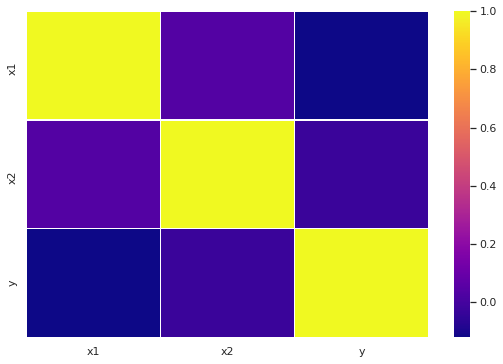

In [9]:
## Heatmap for determing Correlation in Data
import seaborn as sns

sns.set()
fig, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df.corr(), linewidths=.5, ax=ax, cmap='plasma')
plt.show()

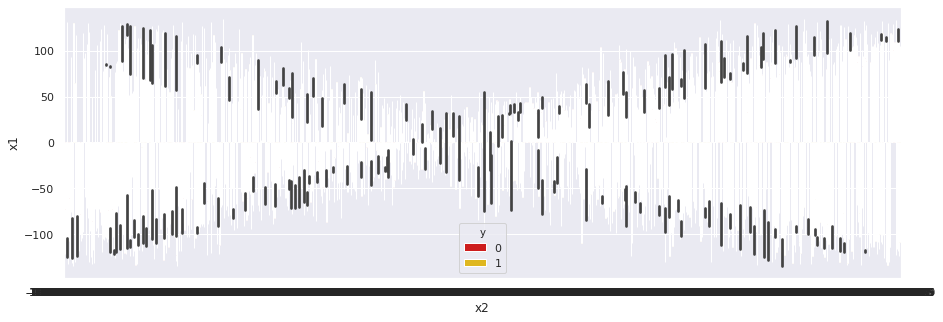

In [55]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,y='x1',x='x2',hue='y',palette='hot')
plt.show()

# Building Models

In [10]:
import numpy as np
import pandas as pd
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,classification_report,f1_score,matthews_corrcoef,recall_score,plot_roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,mean_squared_error,mean_absolute_error
%matplotlib inline
import seaborn as sns

In [11]:
X = df.drop('y',axis=1)
y = df['y']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2, random_state=52)
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of Y_train:', y_train.shape)
print('Shape of Y_test:', y_test.shape)

Shape of X_train: (1781, 2)
Shape of X_test: (446, 2)
Shape of Y_train: (1781,)
Shape of Y_test: (446,)


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Logistic Regression

In [18]:
log_reg = LogisticRegression()

In [19]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [20]:
logr_pred = log_reg.predict(X_test)

In [21]:
accuracyLR = accuracy_score(y_test,logr_pred)
accuracyLR

0.5896860986547086

In [ ]:
It is observed that Accuracy of Logistc Regression model  is 58.9 percentage

# HyperParameter Tuning of Logistic Regression

In [22]:
log_reg = LogisticRegression()
grid = {"penalty" : ["l1", "l2"],"C" : np.arange(0,100,1)}
log_reg_cv = GridSearchCV(log_reg, grid, cv=3)
log_reg_cv.fit(X_train,y_train)
print("Tuned hyperparameter n_estimators: {}".format(log_reg_cv.best_params_))
print("Best score: {}".format(log_reg_cv.best_score_))
print("Best Estimator: {}".format(log_reg_cv.best_estimator_))

/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning:

/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pysagar/anaconda3/l

/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pysagar/anaconda3/l

/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning:

/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning:

/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pysagar/anaconda3/l

/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pysagar/anaconda3/l

/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pysagar/anaconda3/l

/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pysagar/anaconda3/l

/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pysagar/anaconda3/l

/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pysagar/anaconda3/l

/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pysagar/anaconda3/l

/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pysagar/anaconda3/l

/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pysagar/anaconda3/l

/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning:

/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning:

/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pysagar/anaconda3/l

/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pysagar/anaconda3/l

/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pysagar/anaconda3/l

/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pysagar/anaconda3/l

/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pysagar/anaconda3/l

/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pysagar/anaconda3/l

/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning:

Tuned hyperparameter n_estimators: {'C': 4, 'penalty': 'l2'}
Best score: 0.5833820687671166
Best Estimator: LogisticRegression(C=4)


/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning:

In [23]:
results_NB = pd.DataFrame(log_reg_cv.cv_results_['params'])
results_NB['test_score'] = log_reg_cv.cv_results_['mean_test_score']
results_NB

,C,penalty,test_score
0,0,l1,NaN
1,0,l2,NaN
2,1,l1,NaN
3,1,l2,0.533408
4,2,l1,NaN
...,...,...,...
195,97,l2,0.549709
196,98,l1,NaN
197,98,l2,0.551396
198,99,l1,NaN


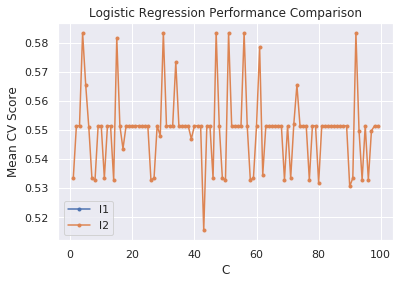

In [24]:
#Performance Comparison of Logistic Regression
import matplotlib.pyplot as plt
for i in ['l1', 'l2']:
    temp = results_NB[results_NB['penalty'] == i]
    temp_average = temp.groupby('C').agg({'test_score': 'mean'})
    plt.plot(temp_average, marker = '.', label = i)
plt.legend()
plt.xlabel('C')
plt.ylabel("Mean CV Score")
plt.title("Logistic Regression Performance Comparison")
plt.show()



Accuracy:  0.5896860986547086
f1-score: 0.38795986622073575
Precision score:  0.5420560747663551
Recall score:  0.3020833333333333
MCC:  0.12658400615655474
Mean Squared Error: 0.6405574926150591
Mean Absolute Error: 0.6405574926150591


              precision    recall  f1-score   support

           0       0.60      0.81      0.69       254
           1       0.54      0.30      0.39       192

    accuracy                           0.59       446
   macro avg       0.57      0.55      0.54       446
weighted avg       0.58      0.59      0.56       446





Text(0.5, 1, 'Confusion Matrix')

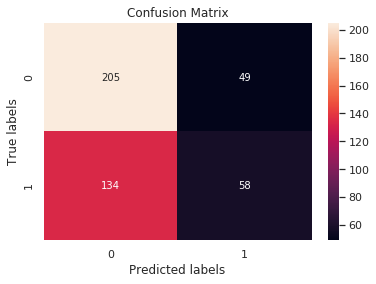

In [25]:
model_LR = log_reg_cv.best_estimator_
model_LR.fit(X_train,y_train)
predictions_LR = model_LR.predict(X_test)
print('\n')
print('Accuracy: ', accuracy_score(y_test,predictions_LR))
print('f1-score:', f1_score(y_test, predictions_LR))
print('Precision score: ', precision_score(y_test,predictions_LR))
print('Recall score: ', recall_score(y_test,predictions_LR))
print('MCC: ',matthews_corrcoef(y_test,predictions_LR) )
print('Mean Squared Error:', mean_squared_error(y_test, predictions_LR) ** 0.5)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions_LR) ** 0.5)
print('\n')
print(classification_report(y_test, predictions_LR))
print('\n')
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, predictions_LR), annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
#accNameListAfterTuning.append('LogisticRegression')
#accValueListAfterTuning.append(accuracy_score(y_test,predictions_LR))

### It is observed that Accuracy of Logistc Regression after HYperParameter Tuning  is 59  percentage

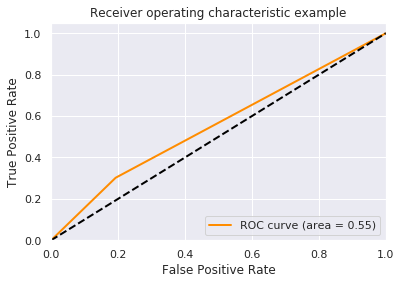

In [26]:
from sklearn.metrics import r2_score,classification_report,f1_score,matthews_corrcoef,recall_score,roc_curve,auc
clf = LogisticRegression()
model=log_reg.fit(X_train,y_train)

pred_val = log_reg.predict(X_test)
### Compute ROC curve and ROC area for predictions on validation set
fpr, tpr, _ = roc_curve(y_test, pred_val)
roc_auc = auc(fpr, tpr)
### Plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# SVM

In [16]:
# Changing the kernel function
kernels = ["linear", "poly", "rbf", "sigmoid"]

In [17]:
from sklearn.svm import SVC
report_listt = []
i = 1
for k in kernels:
    print("Model",i,"with Kernel =", k)
    i = i + 1
    model = SVC(kernel= k, C = .01)
    model.fit(X_train, y_train)
    Y_predict = model.predict(X_test)
    report = classification_report(y_test, Y_predict, output_dict=True )
    report_listt.append(report)
    print(classification_report(y_test, Y_predict))

Model 1 with Kernel = linear


/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pysagar/anaconda3/lib/

              precision    recall  f1-score   support

           0       0.57      1.00      0.73       254
           1       0.00      0.00      0.00       192

    accuracy                           0.57       446
   macro avg       0.28      0.50      0.36       446
weighted avg       0.32      0.57      0.41       446

Model 2 with Kernel = poly
              precision    recall  f1-score   support

           0       0.57      1.00      0.73       254
           1       0.00      0.00      0.00       192

    accuracy                           0.57       446
   macro avg       0.28      0.50      0.36       446
weighted avg       0.32      0.57      0.41       446

Model 3 with Kernel = rbf


/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pysagar/anaconda3/lib/

              precision    recall  f1-score   support

           0       0.57      1.00      0.73       254
           1       0.00      0.00      0.00       192

    accuracy                           0.57       446
   macro avg       0.28      0.50      0.36       446
weighted avg       0.32      0.57      0.41       446

Model 4 with Kernel = sigmoid
              precision    recall  f1-score   support

           0       0.57      1.00      0.73       254
           1       0.00      0.00      0.00       192

    accuracy                           0.57       446
   macro avg       0.28      0.50      0.36       446
weighted avg       0.32      0.57      0.41       446



/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pysagar/anaconda3/lib/

Kernel - linear  :: Avg Accuracy - 0.28475336322869954
Kernel - poly  :: Avg Accuracy - 0.28475336322869954
Kernel - rbf  :: Avg Accuracy - 0.28475336322869954
Kernel - sigmoid  :: Avg Accuracy - 0.28475336322869954


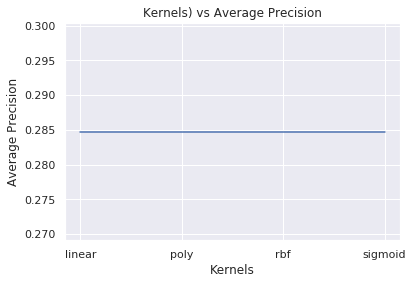

In [18]:
import matplotlib.pyplot as plt
y_prec = []
y_rec = []
for i in range(len(kernels)):
    y_prec.append(report_listt[i]['macro avg']['precision'])
    y_rec.append(report_listt[i]['macro avg']['recall'])
for i in range(len(kernels)):
    print("Kernel -",kernels[i]," :: Avg Accuracy -", y_prec[i])
# creating the bar plot
plt.plot(kernels, y_prec)
plt.title("Kernels) vs Average Precision")
plt.xlabel("Kernels")
plt.ylabel("Average Precision")
plt.show()

### It is Observed that Accuracy of  Linear  KNN is 28 percentage and Rbf  KNN is 28.47 percentage

# Hyperparameter Tuning of SVM

In [19]:
# Change values of c to identify the best model.
clistt = [0.01, 0.001]
report_listt = []
i = 1
for c in clistt:
    print("Model",i,"with C =", c)
    i = i + 1
    model = SVC(kernel='linear', C = c)
    model.fit(X_train, y_train)
    Y_predict = model.predict(X_test)
    report = classification_report(y_test, Y_predict, output_dict=True )
    report_listt.append(report)
    print(classification_report(y_test, Y_predict))

Model 1 with C = 0.01


/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pysagar/anaconda3/lib/

              precision    recall  f1-score   support

           0       0.57      1.00      0.73       254
           1       0.00      0.00      0.00       192

    accuracy                           0.57       446
   macro avg       0.28      0.50      0.36       446
weighted avg       0.32      0.57      0.41       446

Model 2 with C = 0.001
              precision    recall  f1-score   support

           0       0.57      1.00      0.73       254
           1       0.00      0.00      0.00       192

    accuracy                           0.57       446
   macro avg       0.28      0.50      0.36       446
weighted avg       0.32      0.57      0.41       446



/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pysagar/anaconda3/lib/

In [20]:
import matplotlib.pyplot as plt
y_prec = []
for i in range(len(report_listt)):
    y_prec.append(report_listt[i]['macro avg']['precision'])
for i in range(len(clistt)):
    print("C(Regularization parameter) -",clistt[i]," :: Avg Accuracy -", y_prec[i])

C(Regularization parameter) - 0.01  :: Avg Accuracy - 0.28475336322869954
C(Regularization parameter) - 0.001  :: Avg Accuracy - 0.28475336322869954


0.5695067264573991

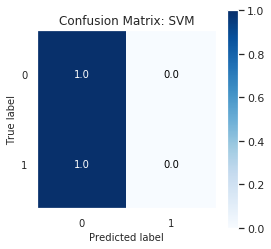

In [24]:
# Best model is for C = 0.2
import scikitplot as skplt
from sklearn.metrics import accuracy_score
model = SVC(kernel='linear', C = .2)
model.fit(X_train, y_train)
Y_predict = model.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, Y_predict, figsize=(4,4),title='Confusion Matrix: SVM',normalize=True ,cmap='Blues')
s1 = accuracy_score(y_test, Y_predict)
s1

0.5695067264573991

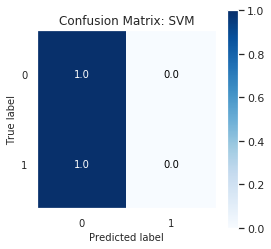

In [54]:
# Best model is for C = 0.2
import scikitplot as skplt
from sklearn.metrics import accuracy_score
model = SVC(kernel='rbf', C = .2)
model.fit(X_train, y_train)
Y_predict = model.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, Y_predict, figsize=(4,4),title='Confusion Matrix: SVM',normalize=True ,cmap='Blues')
s1 = accuracy_score(y_test, Y_predict)
s1

### It is Observed that Accuracy of  Linear  KNN is 28 percentage and Rbf  KNN is 28.47 percentage

### It is Observed that Accuracy of  Linear  KNN after Hyper Parameter Tuning  is 56.9 percentage and Rbf  KNN is 56.9  percentage 

# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
DecisionTreeClassifier(class_weight=None , criterion="gini",max_depth=None ,max_features=None , max_leaf_nodes=None ,min_impurity_split=1e-07, min_samples_leaf=1,min_samples_split=2, min_weight_fraction_leaf=0.0,random_state=None , splitter="best")
Y_pred = dt.predict(X_test)
Y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,

In [28]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,Y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9293799212598426

In [30]:

from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [31]:
std_slc = StandardScaler()

In [32]:
pca = decomposition.PCA()
dec_tree = tree.DecisionTreeClassifier()

# Hyperparameter Tunng of Decision Tree with PCA

In [33]:
pipe = Pipeline(steps=[('std_slc', std_slc),
('pca', pca),
('dec_tree', dec_tree)])

In [34]:
n_components = list(range(1,X.shape[1]+1, 1))

In [35]:
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
max_features = [6,7,8,9,10,11,12]
min_samples_leaf = [0.10, 0.2, 0.3, 0.4, 0.5]
min_samples_split = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]

In [36]:
parameters = dict(pca__n_components=n_components,
dec_tree__criterion=criterion,
dec_tree__max_depth=max_depth,
dec_tree__min_samples_leaf = min_samples_leaf,
dec_tree__min_samples_split = min_samples_split)

In [38]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X, y)

GridSearchCV(estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('dec_tree', DecisionTreeClassifier())]),
             param_grid={'dec_tree__criterion': ['gini', 'entropy'],
                         'dec_tree__max_depth': [2, 4, 6, 8, 10, 12],
                         'dec_tree__min_samples_leaf': [0.1, 0.2, 0.3, 0.4,
                                                        0.5],
                         'dec_tree__min_samples_split': [0.1, 0.2, 0.3, 0.4,
                                                         0.5, 0.6, 0.7, 0.8,
                                                         0.9],
                         'pca__n_components': [1, 2]})

In [40]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
# print('Max_features:', clf_GS.best_estimator_.get_params()['dec_tree__max_features'])
print('min_samples_leaf:', clf_GS.best_estimator_.get_params()['dec_tree__min_samples_leaf'])
print('min_samples_split:', clf_GS.best_estimator_.get_params()['dec_tree__min_samples_split'])
print()
print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion: gini
Best max_depth: 2
Best Number Of Components: 2
min_samples_leaf: 0.1
min_samples_split: 0.3

DecisionTreeClassifier(max_depth=2, min_samples_leaf=0.1, min_samples_split=0.3)


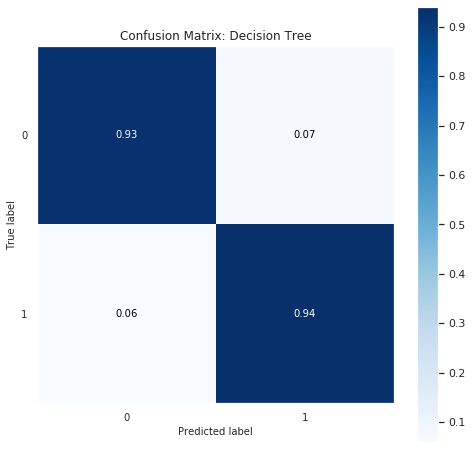

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       254
           1       0.90      0.94      0.92       192

    accuracy                           0.93       446
   macro avg       0.93      0.93      0.93       446
weighted avg       0.93      0.93      0.93       446



In [43]:
import scikitplot as skplt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
DecisionTreeClassifier(class_weight=None , criterion="gini",max_depth=4, min_samples_leaf=0.1,min_samples_split=0.1)
y_predict = dt.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_predict, figsize=(8,8),
title='Confusion Matrix: Decision Tree',
normalize=True ,
cmap='Blues')
plt.show()
print(classification_report(y_test, y_predict))

### It is Observed that Accuracy of Decision Tree  is 92.9  percentage
### It is Observed that Accuracy of Decision Tree after HyperParameter Tuning is 93 percenatage

# KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, p=2) #set K neighbor as 5
knn.fit(X_train,y_train)
predicted_y = knn.predict(X_test)
print("KNN accuracy according to K=5 is :",knn.score(X_test,y_test))

KNN accuracy according to K=5 is : 0.952914798206278


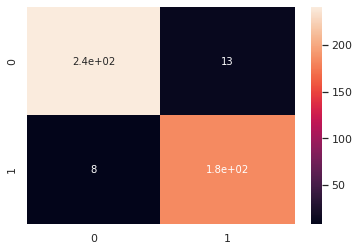

In [47]:
#Confusion Matrix
knn_cf = confusion_matrix(y_test, predicted_y)
## Visualising the Confusion Matrix
sns.heatmap(knn_cf,annot=True )

# Hyperparameter Tuning of KNN

In [48]:
from sklearn.model_selection import GridSearchCV
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [49]:
knn_2 = KNeighborsClassifier()
clf4 = GridSearchCV(knn_2, hyperparameters, cv=10)
best_model = clf4.fit(X_train,y_train)

In [50]:
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 2
Best n_neighbors: 24


In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier(n_neighbors = 2) #set K neighbor as 9
knn2.fit(X_train,y_train)
knn_preds2 = knn2.predict(X_test)
print("KNN accuracy according to K=9 is :",knn2.score(X_test,y_test))

KNN accuracy according to K=9 is : 0.9484304932735426


In [61]:
from sklearn.cluster import KMeans
kmeans5 = KMeans(n_clusters=5)
y_km5 = kmeans5.fit_predict(df)
print(y_km5)

[3 3 3 ... 4 4 2]


In [58]:
clusters = list(np.arange(1,11))

In [63]:
distortions = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    distortions.append(kmeans.inertia_)

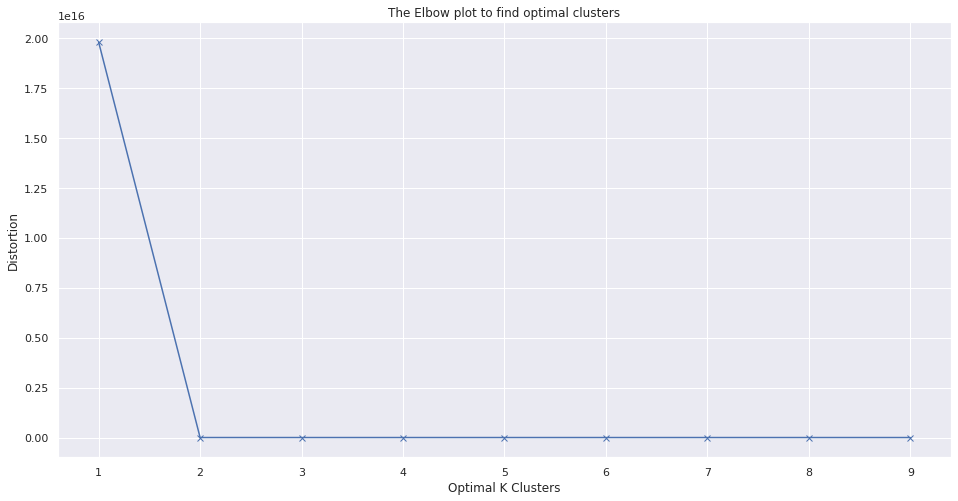

In [64]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Optimal K Clusters')
plt.ylabel('Distortion')
plt.title('The Elbow plot to find optimal clusters')
plt.show()

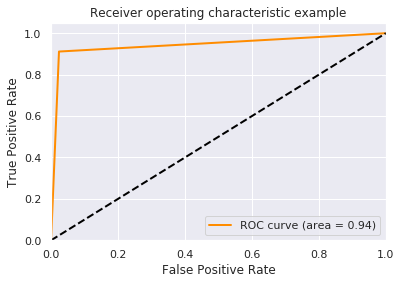

In [67]:

from sklearn.metrics import r2_score,classification_report,f1_score,matthews_corrcoef,recall_score,roc_curve,auc
clf = LogisticRegression()
model=knn2.fit(X_train,y_train)

pred_val = knn2.predict(X_test)
### Compute ROC curve and ROC area for predictions on validation set
fpr, tpr, _ = roc_curve(y_test, pred_val)
roc_auc = auc(fpr, tpr)
### Plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [53]:
print(classification_report(y_test,knn_preds2))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       254
           1       0.93      0.95      0.94       192

    accuracy                           0.95       446
   macro avg       0.95      0.95      0.95       446
weighted avg       0.95      0.95      0.95       446



### It is Observed that Accuracy of KNN is 94.84 percentage
### It is Observed that Accuracy of KNN after HyperParameter Tuning is 95 percenatage

# Comparing all Models

# Reason for Highest Accuracy -KNN 